## Import all required libraries


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

## Load Train and Test data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_full_X, train_full_y), (test_X, test_y) = fashion_mnist.load_data()

In [3]:
#expand 1 more dimention as 1 for colour channel gray
train_full_X = train_full_X.reshape(train_full_X.shape[0], 28, 28,1)
test_X = test_X.reshape(test_X.shape[0], 28, 28,1)

## Designing Fully Connected Neural Network Architecture

In [4]:
model = Sequential([
    #Lambda(standardize, input_shape=(28,28,1)),
    Convolution2D(32,(3,3), input_shape=(28,28,1), activation='relu'),
    Convolution2D(32,(3,3), activation='relu'),
    MaxPooling2D(),
    Convolution2D(64,(3,3), activation='relu'),
    Convolution2D(64,(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
    ])

Compile network

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

Split the data

In [6]:
train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.10, random_state=42)


Run the model

In [7]:
early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],verbose=1)

Epoch 1/200
106/106 [==============================] - 36s 334ms/step - loss: 1.2887 - accuracy: 0.6380 - val_loss: 0.7460 - val_accuracy: 0.7295
Epoch 2/200
106/106 [==============================] - 35s 332ms/step - loss: 0.7050 - accuracy: 0.7435 - val_loss: 0.6790 - val_accuracy: 0.7480
Epoch 3/200
106/106 [==============================] - 35s 327ms/step - loss: 0.6327 - accuracy: 0.7687 - val_loss: 0.6359 - val_accuracy: 0.7547
Epoch 4/200
106/106 [==============================] - 36s 336ms/step - loss: 0.5937 - accuracy: 0.7840 - val_loss: 0.5682 - val_accuracy: 0.7947
Epoch 5/200
106/106 [==============================] - 35s 333ms/step - loss: 0.5551 - accuracy: 0.7971 - val_loss: 0.5742 - val_accuracy: 0.7947
Epoch 6/200
106/106 [==============================] - 36s 337ms/step - loss: 0.5338 - accuracy: 0.8072 - val_loss: 0.5460 - val_accuracy: 0.8013
Epoch 7/200
106/106 [==============================] - 36s 337ms/step - loss: 0.5142 - accuracy: 0.8136 - val_loss: 0.5733 -

<AxesSubplot:title={'center':'Accuracy'}>

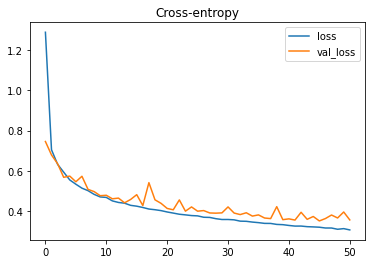

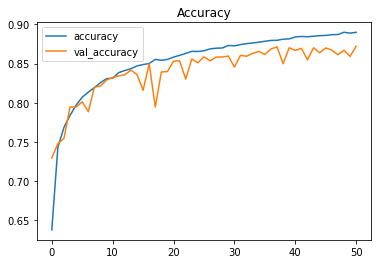

In [8]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [9]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 3s 8ms/step - loss: 0.3690 - accuracy: 0.8707


[0.3689567744731903, 0.8707000017166138]